<a href="https://colab.research.google.com/github/ickma2311/mycolab/blob/main/RL/temporal_difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install "gymnasium[classic_control]"

# Belleman optimality Equation
$$
Q^*(s, a) = \left[ r(s,a)+ \max_{s'}Q^*(s',a') \right]
$$

Explains:


*   r is reward
*   s is current status
*   a is current action
*  s' is next status
*  a' is next action


Here Q* is simliar to the sum of max reward of all posible next steps
 $$Q^* ≈ \sum_{s'} \max(r(s',a'))$$




# Temporal Difference
$$
Δ_t=E(Q(s))-Q(S)
$$

Given
$$
E(Q)=r+maxQ(s')
$$
so,
$$
Δ_t=r+maxQ(s')-Q(s)
$$

Then training will be
$$
Q(s)+ α(r+maxQ(s')-Q(s)
$$

* https://gymnasium.farama.org/introduction/train_agent/

* https://github.com/SeeknnDestroy/DQN-CartPole/blob/master/dql-cartpole.ipynb

In [2]:
import gymnasium as gym
env = gym.make("Blackjack-v1")

observation, info = env.reset(seed=42)


In [3]:
from collections import defaultdict
import numpy as np
class RLAgent:
  def __init__(self,evn,
             lr=1e-1,future_discount=0.95,
             init_epsion=1,epsilon_decay=1e-5,min_epsion=0.1):
    self.env=env
    self.lr=lr
    self.future_discount=future_discount
    self.epsilon=init_epsion
    self.epsilon_decay=epsilon_decay
    self.min_epsion=min_epsion
    self.q_table=defaultdict(lambda:np.zeros(env.action_space.n))

  def act(self,observation):
    if np.random.random()<self.epsilon:
      return self.env.action_space.sample()
    else:
      return np.argmax(self.q_table[observation])

  def train(self,observation,next_observation,action,reward,done):
    future_rewad=self.future_discount*np.max(self.q_table[next_observation])
    if done:
      future_rewad=0
    delta=reward+future_rewad-self.q_table[observation][action]
    self.q_table[observation][action]+=self.lr*delta
    return delta


  def decay_epsilon(self):
    self.epsilon=max(self.min_epsion,self.epsilon-self.epsilon_decay)






In [4]:
class RandomAgent:
  def __init__(self,env):
    self.env=env
  def act(self):
    return self.env.action_space.sample()

In [5]:

rl_agent=RLAgent(env)
random_agent=RandomAgent(env)




In [6]:
from tqdm import tqdm
n_episodes=10000
n_wins=0
for episode in tqdm(range(n_episodes)):
  done=False
  observation,info=env.reset()

  while not done:
    action=random_agent.act()
    observation,reward,terminated,truncated,info=env.step(action)
    n_wins+=reward
    done=terminated or truncated

n_wins

100%|██████████| 10000/10000 [00:03<00:00, 3305.30it/s]


-3885.0

In [7]:
# use RL Agent
rewards=[]
n_episodes=100000
log_step=10000
errors=[]
for episode in tqdm(range(n_episodes)):
  done=False
  observation,info=env.reset()


  while not done:
    action=rl_agent.act(observation)
    next_observation,reward,terminated,truncated,info=env.step(action)
    error=rl_agent.train(observation,next_observation,action,reward,terminated)
    done=terminated or truncated
    observation=next_observation
    errors.append(error)
    if reward==0:
      continue
    rewards.append(reward)
  rl_agent.decay_epsilon()
  if episode%log_step==0:
    print(np.mean(errors))
    errors=[]


  1%|          | 708/100000 [00:00<00:28, 3537.42it/s]

-1.0


 10%|█         | 10296/100000 [00:03<00:33, 2649.90it/s]

-0.056014562746804095


 21%|██        | 20724/100000 [00:06<00:18, 4359.83it/s]

-0.0026165159186212696


 31%|███       | 31076/100000 [00:07<00:09, 7279.31it/s]

-0.001367593306998308


 41%|████▏     | 41318/100000 [00:09<00:08, 7028.54it/s]

-0.005713497055750912


 51%|█████     | 50910/100000 [00:10<00:06, 7169.81it/s]

-0.007794526898978332


 61%|██████    | 61197/100000 [00:12<00:05, 7126.57it/s]

0.0015466222380600147


 71%|███████   | 71143/100000 [00:13<00:04, 6982.66it/s]

-0.002797877476014764


 81%|████████  | 81155/100000 [00:14<00:02, 6967.17it/s]

-0.002584813296046884


 91%|█████████ | 91155/100000 [00:16<00:01, 6692.15it/s]

-0.004769869605885739


100%|██████████| 100000/100000 [00:18<00:00, 5481.55it/s]


In [8]:
sum(rewards)

-23819.0

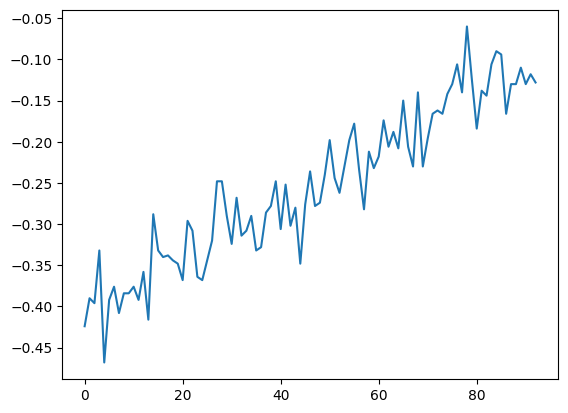

In [9]:
import matplotlib.pyplot as plt
rewards_grouped_avg=[]
group_size=1000
for i in range(int(len(rewards)/group_size)):
  start_i=i*group_size
  end_i=start_i+group_size
  rewards_grouped_avg.append(np.mean(rewards[start_i:end_i]))
plt.plot(rewards_grouped_avg)